<a href="https://colab.research.google.com/github/jcastanedaga/Environmental-Hydrogeology22-1/blob/main/WQChartPy_for_PWdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to illustrate how to use WQChartPy

## Introduction

This Jupyter file was created to illustrated how to use WQChartPy by using the example geochemical dataset taken from Figure 2b of Moreno Merino et al. (2021). This dataset contains a total of 2,124 groundwater samples. Moreno Merino et al. (2021) used this dataset to introduce the D-Piper diagram, which displays the spatial point density instead of individual points. The D-Piper diagram overcomes the limitation that the symbols overlap and the data distribution becomes obscured when there are hundreds of even  thousands of samples.

## Trilinear Piper representation 

### Load data

In [ ]:
!pip install wqchartpy

     |████████████████████████████████| 21.7 MB 3.1 MB/s 
     |████████████████████████████████| 11.2 MB 25.8 MB/s 
     |████████████████████████████████| 930 kB 30.7 MB/s 
  Created wheel for wqchartpy: filename=wqchartpy-0.1.9-py3-none-any.whl size=21693007 sha256=0b0d8b9231ebe83d38942445e5059c2e3a600843e6a507e3e394b875adcbd0f5
  Stored in directory: /root/.cache/pip/wheels/c3/17/63/5c1a28296cddf34d9334d1ec376edccdcc3e80aa6189f82bb7
Successfully built wqchartpy
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Paso 1 correr esta celda para habilitar acceso a drive
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
##### EJECUTAR CADA VEZ QUE SE CAMBIE EL ARCHIVO EN DRIVE ##########
# paso 2: agregar el link del archivo csv como compartido para todos
link = "https://drive.google.com/file/d/1kY2Z0i6AtD08cI0i7QUGu9WVvxXJnXHC/view?usp=sharing"


import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('data_puerto_Wilches.csv') 
 
df = pd.read_csv('data_puerto_Wilches.csv')

In [ ]:
# Show the number of water samples
print('Totla number of samples: %d' %len(df))

Totla number of samples: 29


In [ ]:
# Show the first five rows
df.head(30)
#df = df.head(30)

,Sample,Label,Marker,Size,Color,Alpha,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
0,M-33212,ABA,o,10,red,0.6,9,4.0,14.0000,2.4000,87,0,0.500,0.30
1,M-33625,ABA,o,10,red,0.6,6,1.0,42.2130,1.6130,124,0,0.500,0.50
2,M-33210,Pozo,o,10,blue,0.6,6,3.0,10.1000,2.0000,50,0,0.500,1.10
3,M-33221,Pozo profundo,o,10,green,0.6,12,4.0,10.8000,3.8000,77,0,1.600,0.60
4,M-33128,Pozo profundo,o,10,green,0.6,10,7.0,3.5000,3.5000,71,0,2.800,1.00
5,M-33216,Pozo profundo,o,10,green,0.6,9,2.0,7.1000,3.1000,54,0,1.600,1.80
6,M-33237,Pozo profundo,o,10,green,0.6,1,1.0,0.8000,0.5000,0,0,1.100,0.20
7,M-33243,Pozo profundo,o,10,green,0.6,9,5.0,8.1000,4.6000,74,0,0.300,0.20
8,M-33595,Pozo profundo,o,10,green,0.6,8,4.0,7.9970,4.8954,63,0,0.200,0.50
9,M-33222,Pozo,o,10,blue,0.6,13,8.0,10.6000,5.6000,108,0,0.300,0.70


### Display the samples by using Trilinear Piper diagram

In [ ]:
!pip install matplotlib==3.1.1

Trilinear Piper plot created. Saving it to /content 



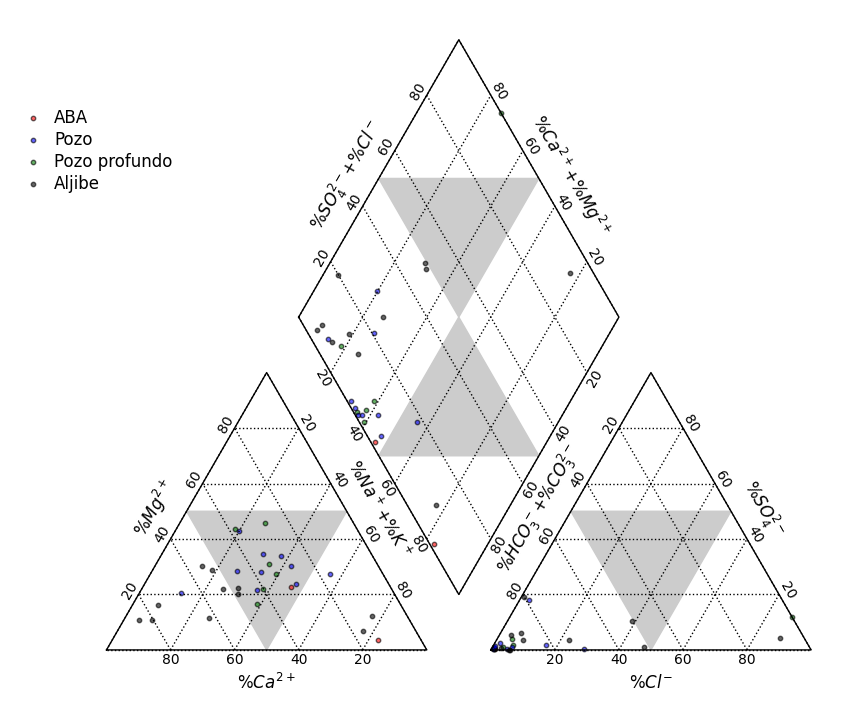

In [ ]:
# Import WQChartPy
from wqchartpy import triangle_piper

# Draw the diagram
triangle_piper.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='png')

### Display the samples by using contour-filled Piper diagram

/usr/local/lib/python3.7/dist-packages/wqchartpy/contour_piper.py:312: UserWarning: Use the colorbar set_ticks() method instead.
  cb.ax.set_yticks([0, z.max()])


Contour-filed Piper plot created. Saving it to /content 



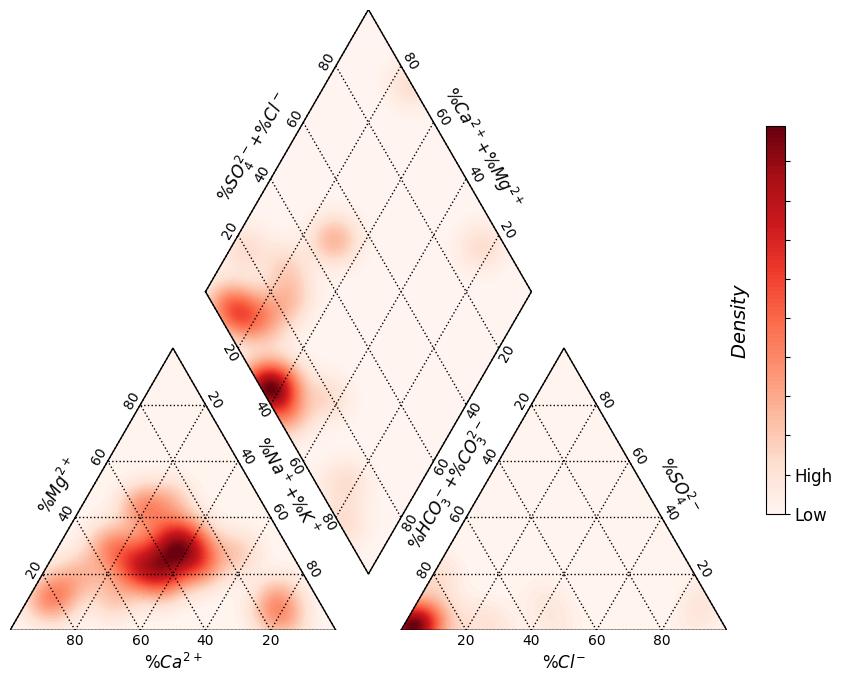

In [ ]:
# Import WQChartPy
from wqchartpy import contour_piper

# Draw the diagram
contour_piper.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='png')

Stiff plot created for M-33212. Saving it to /content

Stiff plot created for M-33625. Saving it to /content

Stiff plot created for M-33210. Saving it to /content

Stiff plot created for M-33221. Saving it to /content

Stiff plot created for M-33128. Saving it to /content

Stiff plot created for M-33216. Saving it to /content

Stiff plot created for M-33237. Saving it to /content

Stiff plot created for M-33243. Saving it to /content

Stiff plot created for M-33595. Saving it to /content

Stiff plot created for M-33222. Saving it to /content

Stiff plot created for M-33364. Saving it to /content

Stiff plot created for M-33365. Saving it to /content

Stiff plot created for M-33616. Saving it to /content

Stiff plot created for M-33122. Saving it to /content

Stiff plot created for M-33130. Saving it to /content

Stiff plot created for M-33127. Saving it to /content

Stiff plot created for M-33098. Saving it to /content

Stiff plot created for M-33369. Saving it to /content

Stiff plot

/usr/local/lib/python3.7/dist-packages/wqchartpy/stiff.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(3, 3))


Stiff plot created for M-33119. Saving it to /content

Stiff plot created for M-33117. Saving it to /content

Stiff plot created for M-33367. Saving it to /content

Stiff plot created for M-33118. Saving it to /content

Stiff plot created for M-33134. Saving it to /content

Stiff plot created for M-33430. Saving it to /content

Stiff plot created for M-33125. Saving it to /content

Stiff plot created for M-33126. Saving it to /content

Stiff plot created for M-33097. Saving it to /content



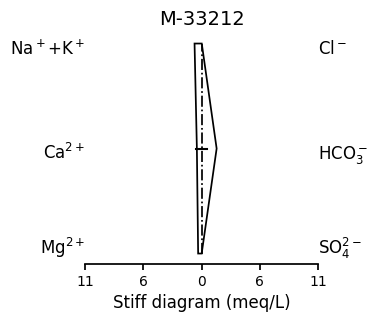

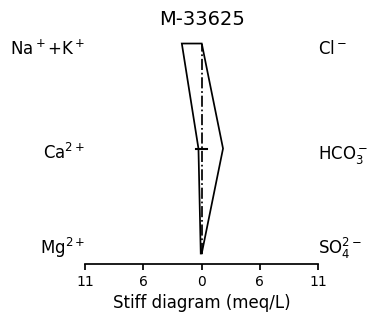

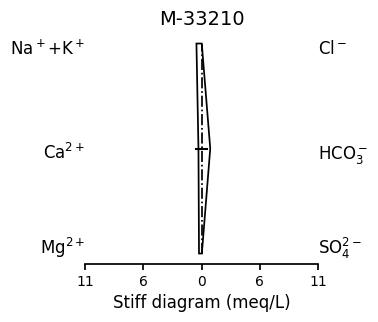

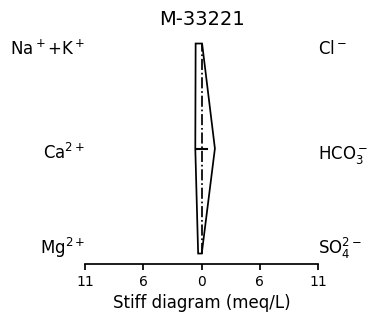

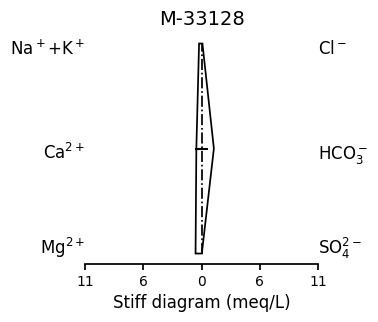

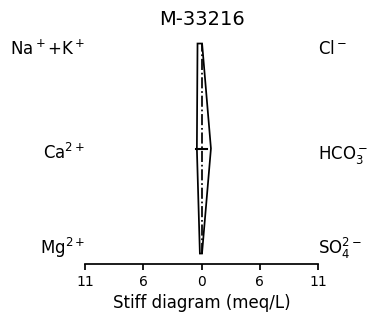

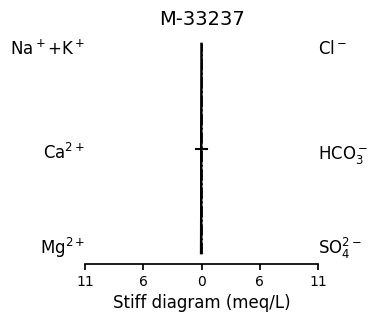

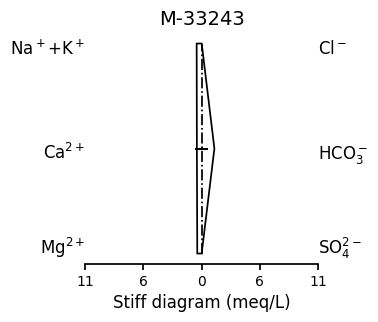

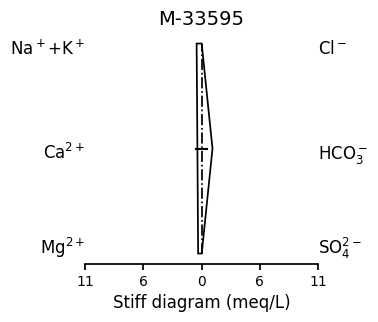

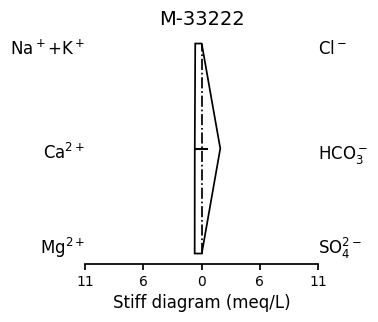

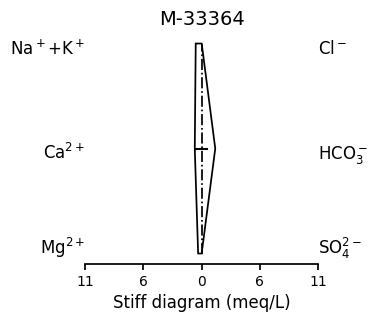

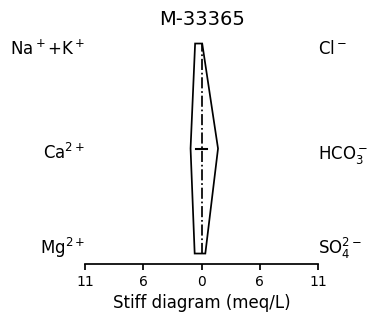

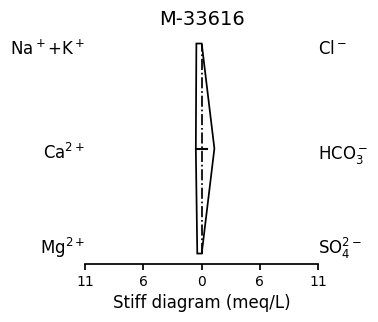

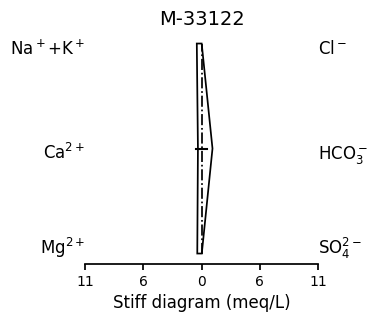

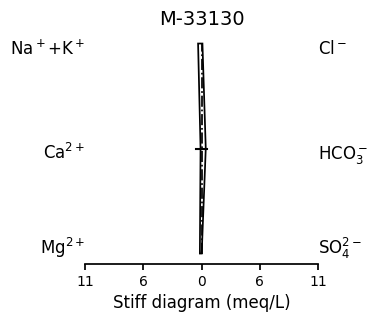

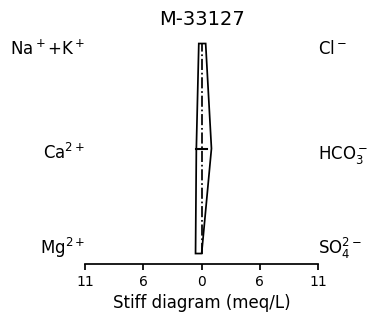

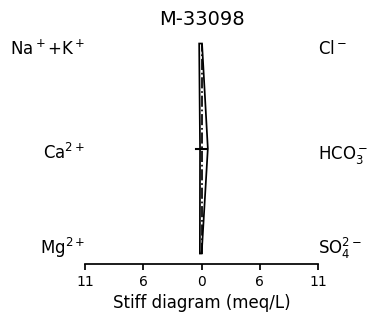

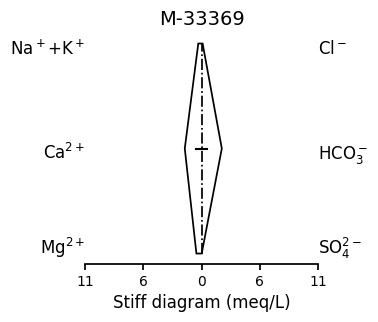

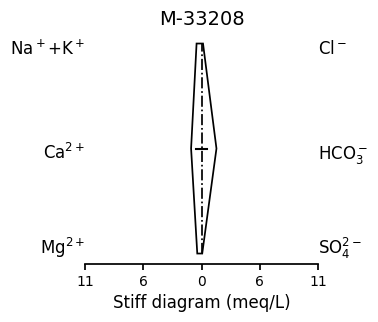

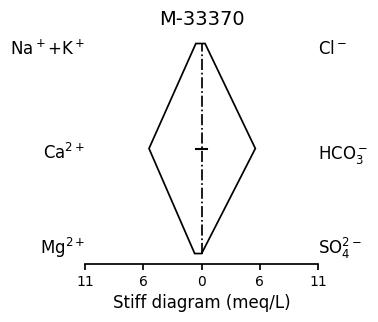

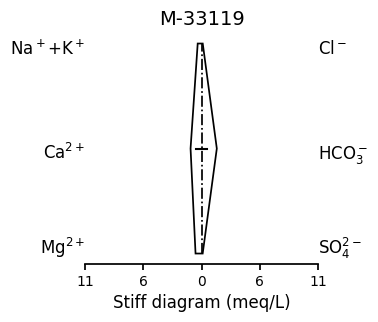

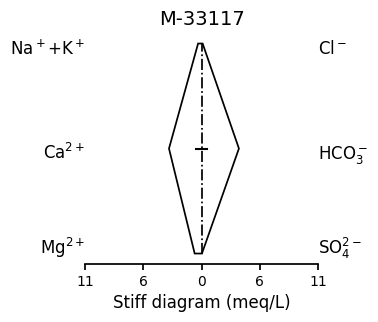

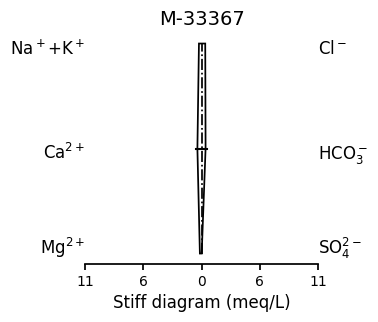

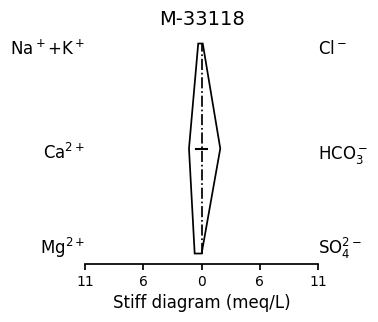

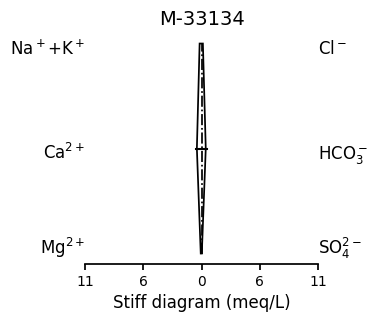

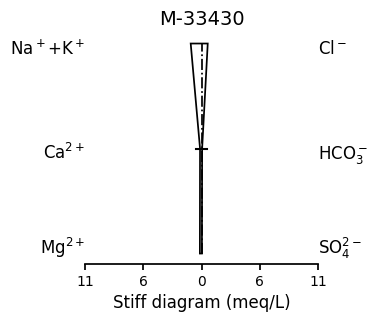

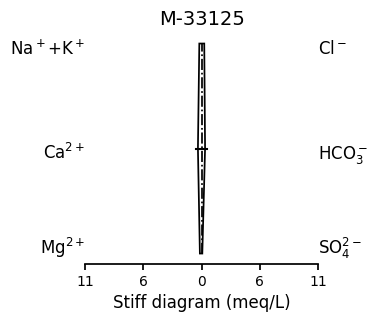

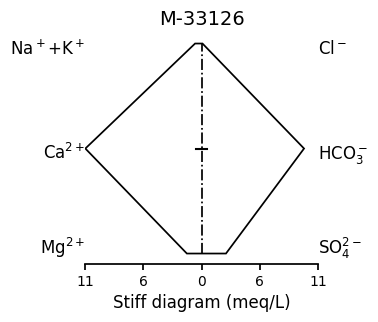

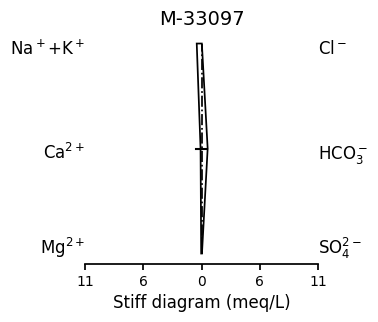

In [ ]:
from wqchartpy import stiff

stiff.plot(df, unit='mg/L', figname='triangle Piper diagram', figformat='png')

Chernoff face created for M-33212. Saving it to /content

Chernoff face created for M-33625. Saving it to /content

Chernoff face created for M-33210. Saving it to /content

Chernoff face created for M-33221. Saving it to /content

Chernoff face created for M-33128. Saving it to /content

Chernoff face created for M-33216. Saving it to /content

Chernoff face created for M-33237. Saving it to /content

Chernoff face created for M-33243. Saving it to /content

Chernoff face created for M-33595. Saving it to /content

Chernoff face created for M-33222. Saving it to /content

Chernoff face created for M-33364. Saving it to /content

Chernoff face created for M-33365. Saving it to /content

Chernoff face created for M-33616. Saving it to /content

Chernoff face created for M-33122. Saving it to /content

Chernoff face created for M-33130. Saving it to /content

Chernoff face created for M-33127. Saving it to /content

Chernoff face created for M-33098. Saving it to /content

Chernoff face 

/usr/local/lib/python3.7/dist-packages/wqchartpy/chernoff.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(3,3))


Chernoff face created for M-33119. Saving it to /content

Chernoff face created for M-33117. Saving it to /content

Chernoff face created for M-33367. Saving it to /content

Chernoff face created for M-33118. Saving it to /content

Chernoff face created for M-33134. Saving it to /content

Chernoff face created for M-33430. Saving it to /content

Chernoff face created for M-33125. Saving it to /content

Chernoff face created for M-33126. Saving it to /content

Chernoff face created for M-33097. Saving it to /content



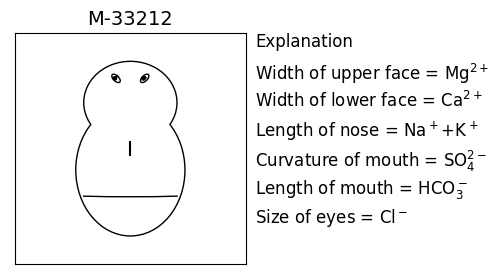

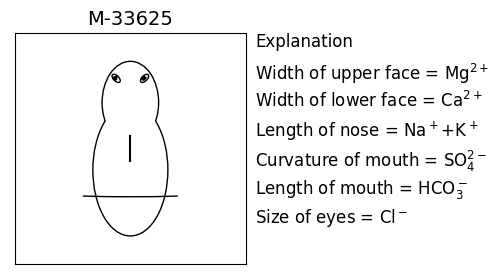

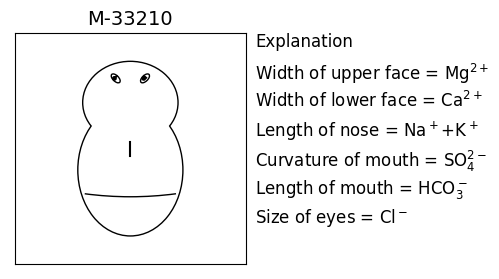

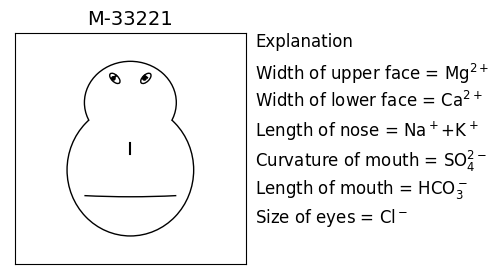

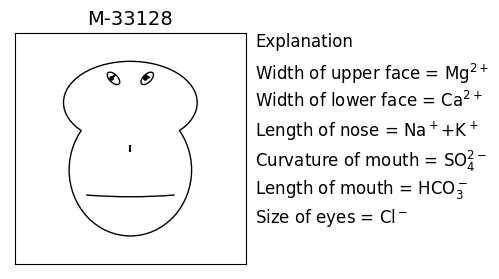

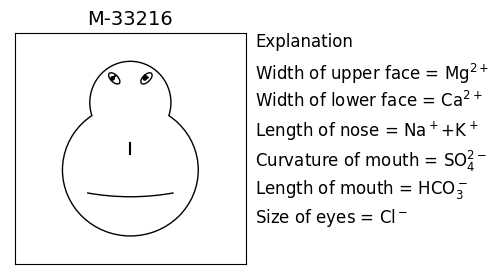

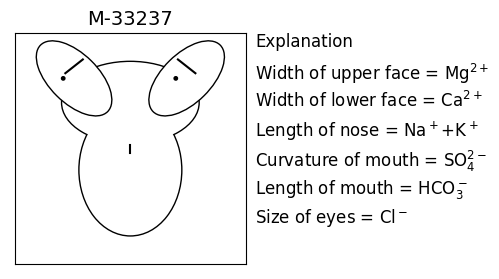

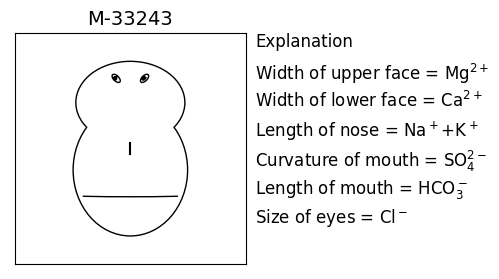

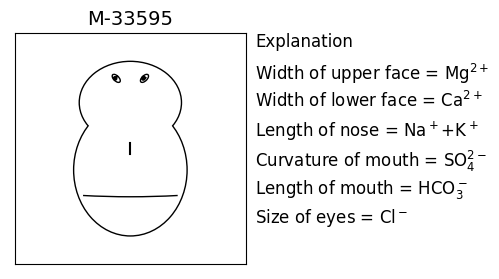

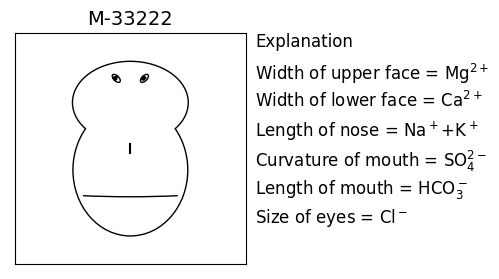

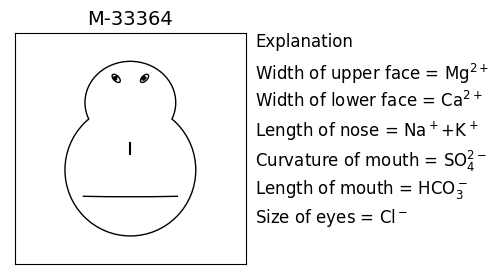

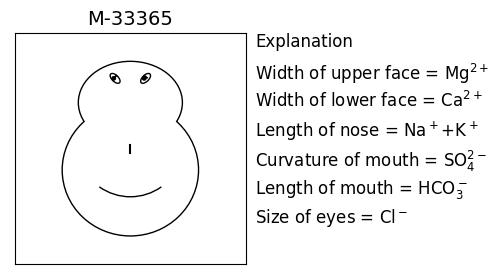

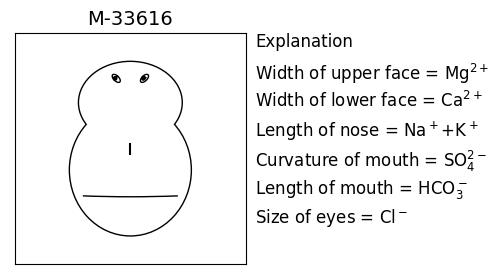

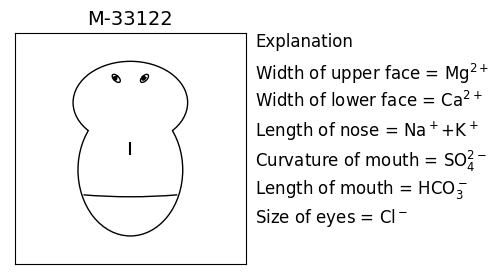

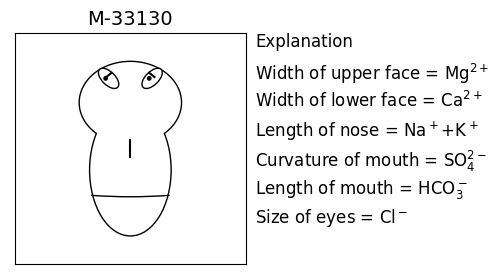

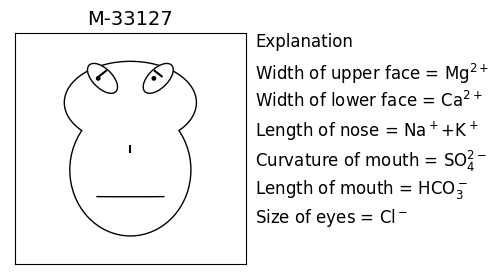

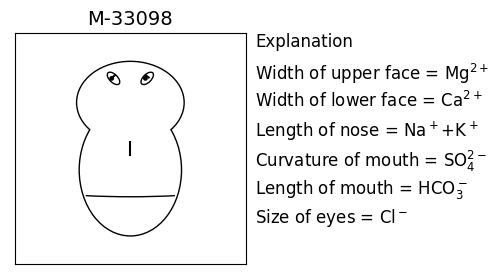

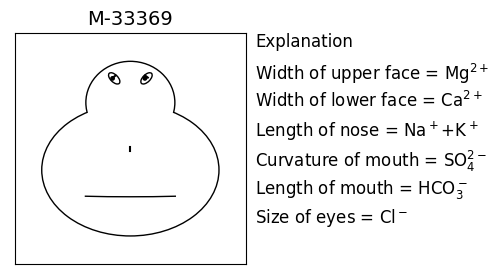

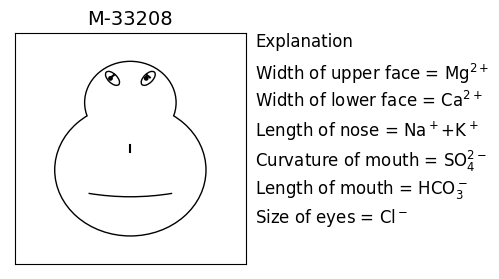

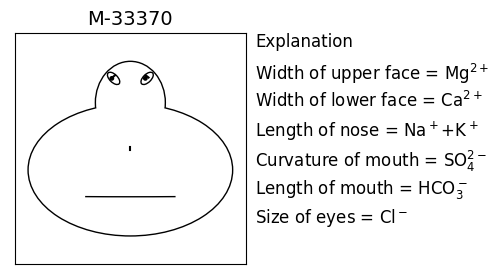

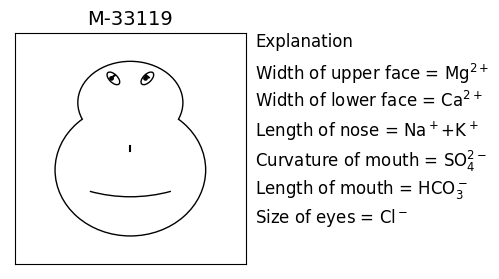

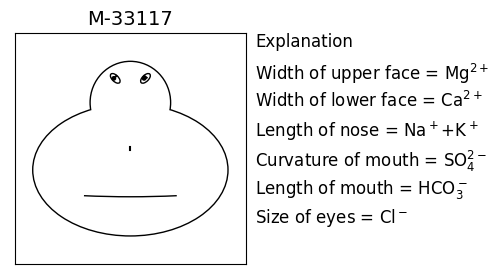

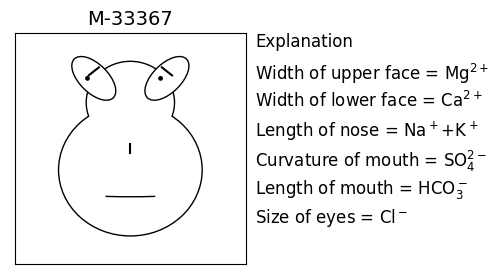

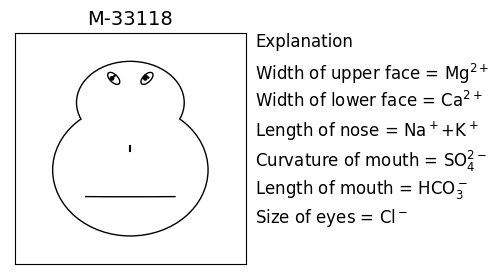

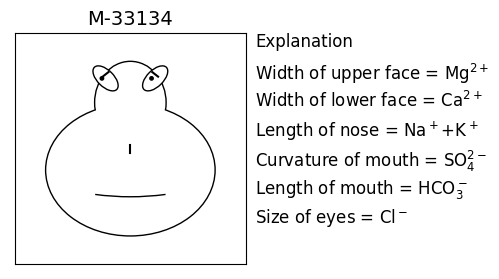

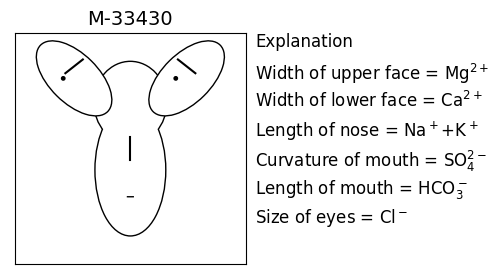

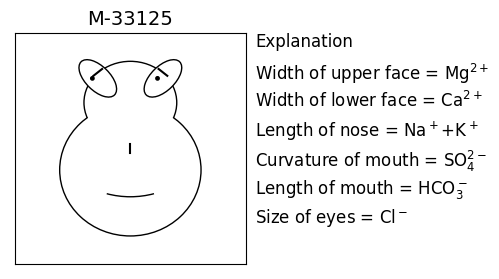

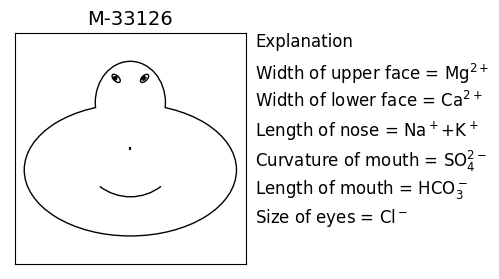

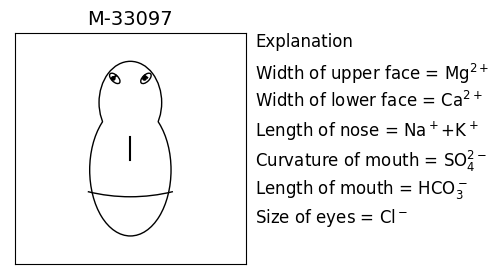

In [ ]:
from wqchartpy import chernoff
chernoff.plot(df, unit='mg/L', figname='chernoff chart', figformat='png')